In [16]:
import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Input, Flatten, Dropout
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
test = pd.read_csv('fashion-mnist_test.csv')
train = pd.read_csv('fashion-mnist_train.csv')

In [18]:
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:,0].values

In [19]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:,0].values

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(60000, 784)
(10000, 784)
(60000,)


In [21]:
def label2name(n):
    if n==0: return 'Tshirt/Top'
    elif n==1: return 'Trouser'
    elif n==2: return 'Pullover'
    elif n==3: return 'Dress'
    elif n==4: return 'Coat'
    elif n==5: return 'Sandal'
    elif n==6: return 'Shirt'
    elif n==7: return 'Sneaker'
    elif n==8: return 'Bag'
    return 'Ankle Boot' #label 9

Coat


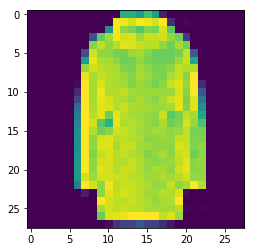

In [22]:
xtest = X_train[6]
xtest = xtest.reshape([28,28])
ytest = y_train[6]
plt.imshow(xtest)
print(label2name(ytest))

In [23]:
num_classes= 10
input_shape = (28,28,1)
X_train = np.reshape(X_train, [X_train.shape[0],28,28,1])
X_test = np.reshape(X_test, [X_test.shape[0],28,28,1])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(60000, 10)


In [24]:
def fashionModel(input_shape = (28, 28, 1)):
    X_input = Input(input_shape)
    X = Conv2D(filters = 32, kernel_size = (5, 5), strides = (1,1), padding = 'same',activation='relu')(X_input)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(X)
    X = Dropout(0.5)(X)

    X = Conv2D(filters = 64, kernel_size = (5,5), strides = (1,1), padding = 'same', activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(X)
    X = Dropout(0.5)(X)
    
    
    X = Conv2D(filters = 128, kernel_size = (5,5), strides = (1,1), padding = 'same', activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(X)
    
    
    X = Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = 'same', activation='relu')(X)
    X = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(X)
    
    
    X = Flatten()(X)
    X = Dense(8192, activation='relu', kernel_initializer='TruncatedNormal',bias_initializer='zeros')(X)
    X = Dense(1024, activation='relu', kernel_initializer='TruncatedNormal',bias_initializer='zeros')(X)
    X = Dense(num_classes, activation='softmax', kernel_initializer='TruncatedNormal',bias_initializer='zeros')(X)
    
    model = Model(inputs = X_input, outputs = X, name='fashionModel')

    return model

In [25]:
model = fashionModel(input_shape = (28,28,1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
__________

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
X_train = X_train/255
X_test = X_test/255
hist = model.fit(X_train, y_train,
          batch_size=512,
          epochs=30,
          validation_data=(X_test, y_test), 
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 42s 702us/step - loss: 0.9112 - acc: 0.6500 - val_loss: 0.5484 - val_acc: 0.7947
Epoch 2/30
15872/60000 [======>.......................] - ETA: 10s - loss: 0.5219 - acc: 0.8048

KeyboardInterrupt: 

In [13]:
# save weights to file
#model.save_weights("weights.h5")

In [11]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

In [15]:
score = model.evaluate(X_test, y_test)
score2 = model.evaluate(X_train, y_train)
print("Train Accuracy: "+str(score2[1]*100)+"%")
print("Test Accuracy: "+str(score[1]*100)+"%")

60000/60000 [==============================] - 18s 293us/step
Train Accuracy: 95.26666666666667%
Test Accuracy: 92.52%


In [12]:
from glob import glob
import cv2

In [13]:
test = np.array(glob("Clothes/*"))

In [14]:
def white2black(img):
    for i in range(28):
        for j in range(28):
            if img[i][j] >= 245 and img[i][j] <= 255: img[i][j] = 0
    return img

Clothes\coat.jpg


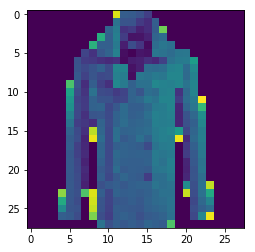

Clothes\sandal.jpg


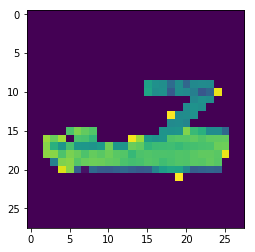

Clothes\shirt.jpg


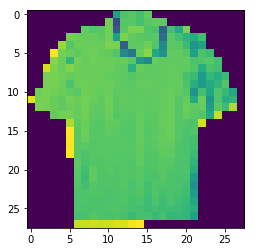

Clothes\sneakers2.jpg


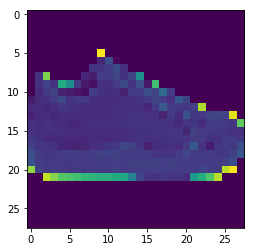

In [15]:
b = []
for img_path in test:
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(28,28))
    img = white2black(img)
    plt.imshow(img)
    plt.show()
    b.append(img)
    
    
b = np.array(b)
b = np.reshape(b, [b.shape[0],b.shape[1],b.shape[2],1])
b = model.predict(b)

In [20]:
for ans in b:
    temp = np.argmax(ans)
    print(label2name(temp))

Coat
Sandal
Shirt
Bag
